In [4]:
import sklearn

In [5]:
def count(n):
 
    # table[i] will store count of solutions for value i.
    # Initialize all table values as 0.
    table = [0 for i in range(n+1)]
 
    # Base case (If given value is 0)
    table[0] = 1
 
    # One by one consider given 3 moves and update the
    # table[] values after the index greater than or equal
    # to the value of the picked move.
    for i in range(3, n+1):
        table[i] += table[i-3]
    for i in range(5, n+1):
        table[i] += table[i-5]
    for i in range(10, n+1):
        table[i] += table[i-10]
 
    return table[n]

In [21]:
n = 20
print('Count for', n, 'is', count(n))
n = 13
print('Count for', n, 'is', count(n))

import matplotlib.pyplot as plt 
digits = datasets.load_digits()
digits.images.shape
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

Count for 20 is 4
Count for 13 is 2


In [18]:
from sklearn import datasets
iris = datasets.load_iris()
a = [2,3,5]

/home/suman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


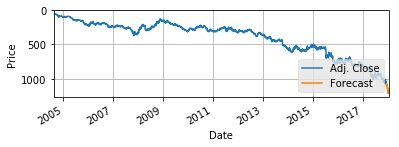

In [23]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [140]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = linear_model.BayesianRidge()
reg = linear_model.LassoLars(alpha=.1)


reg.fit ([[0, 0, 0], [-1, -1, -1], [-2, -2, -2]], [0, 1, 2])
reg.coef_
#reg.alpha_


array([-0.78786797,  0.        ,  0.        ])

In [141]:
""" gjhgjhg
jhjkh
kl
"""
reg.predict([[.9, .9,.9]])

array([-0.49694913])

In [52]:
from sklearn import svm
X = np.array([[0, 0], [1, 1]])
y = [0, 1]
clf = svm.SVC(kernel='precomputed')
gram = np.dot(X, X.T)
clf.fit(gram, y) 
clf.predict(gram)

array([0, 1])